In [1]:
from heapq import heappush, heappop, heapify  
from math import radians, cos, sin, asin, sqrt 

class MinHeap: 
      
    # Constructor to initialize a heap 
    def __init__(self): 
        self.heap = []  
  
    def parent(self, i): 
        return (i-1)//2
      
    # Inserts a new key 'k' 
    def insertKey(self, k): 
        heappush(self.heap, k)            
  
    # Decrease value of key at index 'i' to new_val 
    # It is assumed that new_val is smaller than heap[i] 
    def decreaseKey(self, i, new_val): 
        self.heap[i][0] = new_val
        #print(self.heap[self.parent(i)][0])
        while(i != 0 and self.heap[self.parent(i)][0] > self.heap[i][0]): 
            # Swap heap[i] with heap[parent(i)] 
            self.heap[i][0] , self.heap[self.parent(i)][0] = self.heap[self.parent(i)][0], self.heap[i][0]
            self.heap[i][1] , self.heap[self.parent(i)][1] = self.heap[self.parent(i)][1], self.heap[i][1]
              
    # Method to remove minium element from min heap 
    def extractMin(self): 
        return heappop(self.heap) 
  
    # This functon deletes key at index i. It first reduces 
    # value to minus infinite and then calls extractMin() 
    def deleteKey(self, i): 
        self.decreaseKey(i, float("-inf")) 
        self.extractMin() 
  
    # Get the minimum element from the heap 
    def getMin(self): 
        return self.heap[0] 

In [2]:
from typing import Tuple, Optional

def dijkstra(adj_list: dict, start_vertex: int, weights: Optional[dict] = None) -> Tuple[dict]:
    counter = 0
    curr_num = 0
    dist = {}
    preds = {}
    heap = MinHeap()
    if weights == None:
        weights = {}
        no_weights = True
    else:
        no_weights = False
    for key in adj_list.keys():
        if key == start_vertex:
            dist[key] = 0
            preds[key] = None
        else:
            dist[key] = float("inf")
            preds[key] = None
        if no_weights:
            weights[key] = 1
        heap.insertKey([dist[key], key])
    while len(heap.heap):
        distance, vertex_id = heap.extractMin()
        if distance > dist[vertex_id]:
            continue
        neighs = adj_list[vertex_id]
        for neigh in neighs.keys():
            edge_dist = adj_list[vertex_id][neigh][0]['length'] * weights[neigh]
            if edge_dist + distance < dist[neigh]:
                dist[neigh] = edge_dist + distance
                preds[neigh] = vertex_id
                heap.insertKey([edge_dist + distance, neigh])
    return (dist, preds)
        
        
    
        
    

In [3]:
def nearest_list_for_list(adj_list: dict, list1: list, list2: list, weights: Optional[dict] = None) -> dict:
    nearest = {}
    for obj in list1:
        distances, _ = dijkstra(adj_list, obj, weights)
        min_ = float('inf')
        min_id = -1
        for obj2 in list2:
            if distances[obj2] < min_:
                min_id = obj2
                min_ = distances[obj2]
        nearest[obj] = (min_, min_id)
    return nearest


def nearest_fwd_bwd_list_for_list(adj_list: dict, list1: list, list2: list, weights: Optional[dict] = None) -> dict:
    nearest = {}
    distances_fwd = {}
    distances_bwd = {}
    for obj in list1:
        distances_fwd[obj], _ = dijkstra(adj_list, obj, weights)
    for obj in list2:
        distances_bwd[obj], _ = dijkstra(adj_list, obj, weights)

    for obj in list1:
        min_ = float("inf")
        min_id = -1
        for obj2 in list2:
            if distances_fwd[obj][obj2] + distances_bwd[obj2][obj] < min_:
                min_ = distances_fwd[obj][obj2] + distances_bwd[obj2][obj]
                min_id = obj2
        nearest[obj] = (min_, min_id)
    return nearest

def nearest_bwd_list_for_list(adj_list: dict, list1: list, list2: list, weights: Optional[dict] = None) -> dict:
    nearest = {}
    distances_bwd = {}
    for obj in list2:
        distances_bwd[obj], _ = dijkstra(adj_list, obj, weights)

    for obj in list1:
        min_ = float("inf")
        min_id = -1
        for obj2 in list2:
            if distances_bwd[obj2][obj] < min_:
                min_ = distances_bwd[obj2][obj]
                min_id = obj2
        nearest[obj] = (min_, min_id)
    return nearest

def distances_fwd(adj_list: dict, list1: list, list2: list, weights: Optional[dict] = None) -> Tuple[dict]:
    distances = {}
    preds = {}
    for obj in list1:
        distances[obj], preds[obj] = dijkstra(adj_list, obj, weights)
    return (distances, preds)

def distances_bwd(adj_list: dict, list1: list, list2: list, weights: Optional[dict] = None) -> Tuple[dict]:
    distances = {}
    preds = {}
    for obj2 in list2:
        dist, pred = dijkstra(adj_list, obj2, weights)
        for obj in list1:
            if obj not in distances:
                distances[obj], preds[obj] = {obj2: dist[obj]}, pred
            else:
                distances[obj].update({obj2: dist[obj]})
    return (distances, preds) 

def distances_fwd_bwd(adj_list: dict, list1: list, list2: list, weights: Optional[dict] = None) -> Tuple[dict]:
    distances = {}
    distances_fwd = {}
    distances_bwd = {}
    preds_fwd = {}
    preds_bwd = {}
    preds = {}
    for obj in list1:
        distances_fwd[obj], preds_fwd[obj] = dijkstra(adj_list, obj, weights)
    for obj in list2:
        distances_bwd[obj], preds_bwd[obj] = dijkstra(adj_list, obj, weights)
    
    for obj in list1:
        for obj2 in list2:
            if obj not in distances:
                distances[obj], preds[obj] = {obj2: distances_fwd[obj][obj2] + distances_bwd[obj2][obj]}, {'fwd': preds_fwd[obj],
                                                                                                           'bwd': preds_bwd[obj2]}
            else:
                distances[obj].update({obj2: distances_fwd[obj][obj2] + distances_bwd[obj2][obj]})
    return (distances, preds)

In [4]:
adj_list = {1:{2:{0: {'length': 5}}}, 2:{1:{0: {'length': 3}}}}
distances_fwd(adj_list, [1], [2])

({1: {1: 0, 2: 5}}, {1: {1: None, 2: 1}})

In [5]:
import xml.etree.ElementTree as ET
root = ET.parse('./Ekb.osm').getroot()
nodes = root.findall('./node')
ways = root.findall('./way')

In [239]:
import networkx as nx
import osmnx as ox
from functools import partial
import xml.etree.ElementTree as ET
import random
import math
import numpy as np
import matplotlib.pyplot as plt

class MetricsCalculator():
    
    def __init__(self, path_to_osm: str) -> None:
        self.graph = ox.core.graph_from_file(path_to_osm, simplify=False, retain_all=True)
        self.objs = []
        self.root = ET.parse(path_to_osm).getroot()
        self.weights = {}
        self.nodes = []
        self.inf_objs = []
        for obj in self.inf_objs:
            self.weights[obj] = random.random() + 1
        for obj in self.graph.adj.keys():
            if obj not in self.weights:
                self.weights[obj] = 1
        
        self.func_dict_nearest = {
                                  "fwd_node": partial(nearest_list_for_list, self.graph.adj, self.objs, self.inf_objs, self.weights),
                                  "fwd_inf": partial(nearest_list_for_list, self.graph.adj, self.inf_objs, self.objs, self.weights),
                                  "fwd_bwd_node": partial(nearest_fwd_bwd_list_for_list, self.graph.adj, self.objs, self.inf_objs, self.weights),
                                  "fwd_bwd_inf": partial(nearest_fwd_bwd_list_for_list, self.graph.adj, self.inf_objs, self.objs, self.weights),
                                  "bwd_node": partial(nearest_bwd_list_for_list, self.graph.adj,  self.objs, self.inf_objs, self.weights),
                                  "bwd_inf": partial(nearest_fwd_bwd_list_for_list, self.graph.adj, self.inf_objs, self.objs, self.weights)
                                 }
        self.func_dict_distances = {
                                    "fwd_node": partial(distances_fwd, self.graph.adj, self.objs, self.inf_objs, self.weights),
                                    "fwd_inf": partial(distances_fwd, self.graph.adj, self.inf_objs, self.objs, self.weights),
                                    "bwd_node": partial(distances_bwd, self.graph.adj, self.objs, self.inf_objs, self.weights),
                                    "bwd_inf": partial(distances_bwd, self.graph.adj, self.inf_objs, self.objs, self.weights),
                                    "fwd_bwd_node": partial(distances_fwd_bwd, self.graph.adj, self.objs, self.inf_objs, self.weights),
                                    "fwd_bwd_inf": partial(distances_fwd_bwd, self.graph.adj, self.inf_objs, self.objs, self.weights)
                                    }
    def set_inf_objs(self, objs):
        min_dists = [float("inf") for _ in range(len(objs))]
        self.inf_objs = [0 for _ in range(len(objs))]
        for i in self.nodes:
            phi1 = self.graph.nodes[i]['y']
            l1 = self.graph.nodes[i]['x']
            for j in range(len(objs)):
                phi2 = objs[j]['y']
                l2 = objs[j]['x']
                cos = math.sin(phi1) * math.sin(phi2) + math.cos(phi1) * math.cos(phi2) * math.cos(l1 - l2)
                dist = math.acos(cos) * 6371
                if dist < min_dists[j]:
                    min_dists[j] = dist
                    self.inf_objs[j] = i
        inf_objs_set = set(self.inf_objs)
        self.objs = list(filter(lambda x: x not in inf_objs_set, self.nodes))
        
    def update_nodes_list(self):
        self.nodes = list(self.graph.nodes.keys())
                
    def nearest(self, mode: str, start: str) -> dict:
        return self.func_dict_nearest[mode + "_" + start]()
    
    
    def closer_than_x(self, distance: int, mode: str, start: str) -> dict:
        closer_than_x = {}
        distances, _ = self.func_dict_distances[mode + "_" + start]()
        if start == "node":
            tmp = {'from': self.objs,
                   'to': self.inf_objs}
        elif start == "inf":
            tmp = {'from': self.inf_objs,
                   'to': self.objs}
            
        for obj in tmp['from']:
            for obj2 in tmp['to']:
                if distances[obj][obj2] <= distance * 1000:
                    if obj not in closer_than_x:
                        closer_than_x[obj] = [obj2]
                    else:
                        closer_than_x[obj].append(obj2)

        return closer_than_x
    
    def closest_inf_in_summary(self, mode: str, start: str) -> tuple:
        distances, _ = self.func_dict_distances["fwd_inf"]()
        min_ = float("inf")
        min_id = -1
        for obj in self.inf_objs:
            dist = 0
            for obj2 in self.objs:
                dist += distances[obj][obj2]
            if dist < min_:
                min_ = dist
                min_id = obj
        return (min_, min_id)
    
    def min_furthest_for_inf(self, mode: str) -> tuple:
        distances, _ = self.func_dict_distances[mode + "_" + "inf"]()
        min_ = float("inf")
        min_id = -1
        for obj in self.inf_objs:
            if min_ > max([(distances[obj][obj2], obj) for obj2 in self.objs])[0]:
                min_, min_id = max([(distances[obj][obj2], obj) for obj2 in self.objs])
        return (min_, min_id)
    
    def min_weight_tree(self) -> tuple:
        distances, preds = self.func_dict_distances['fwd_inf']()
        min_ = float("inf")
        min_id = -1
        for obj in self.inf_objs:
            edges = set()
            sum_ = 0
            for obj2 in self.objs:
                pred = preds[obj]
                curr = obj2
                while curr != obj:
                    if (curr, pred[curr]) not in edges:
                        edges.add((curr, pred[curr]))
                        sum_ += (distances[obj][curr] - distances[obj][pred[curr]])
                    curr = pred[curr]
            if sum_ < min_:
                min_ = sum_
                min_id = obj
        for obj in self.objs:
            print(distances[min_id][obj])
        return (min_, min_id)
            
        
    def for_random_inf_obj(self, objs, inf_obj, skip_inf_dists=False):
        distances, preds = distances_fwd(self.graph.adj, [inf_obj], objs, self.weights)
        edges = set()
        sum_ = 0
#         tree = nx.Graph()
        routes_list = []
        for obj in objs:
#             tree.add_node(self.graph.nodes[obj])
            if distances[inf_obj][obj] == float('inf'):
                if skip_inf_dists:
                    return 'no tree'
                else:
                    print('no way to ' + str(obj))
                    continue
            pred = preds[inf_obj]
            curr = obj
            path_list = []
            path_list.append(curr)
            while curr != inf_obj:
                path_list.append(pred[curr])
                if (curr, pred[curr]) not in edges:
                    edges.add((curr, pred[curr]))
                    sum_ += (distances[inf_obj][curr] - distances[inf_obj][pred[curr]])
                curr = pred[curr]
            routes_list.append(list(reversed(path_list)))
#         for edge in edges:
#             tree.add_edge(self.graph.nodes[edge[0]], self.graph.nodes[edge[1]])
        return (sum_, routes_list)

    
    def objs_into_clusters(self, objs, k):
        if k > len(objs):
            return
        clusters = []
        dists_dict = {}
        
        for i in range(len(objs)):
            clusters.append([i])
            dists_dict[i] = {}
            
        for i in range(len(objs)):
            phi1 = self.graph.nodes[objs[i]]['y']
            l1 = self.graph.nodes[objs[i]]['x']
            for j in range(i + 1, len(objs)):
                phi2 = self.graph.nodes[objs[j]]['y']
                l2 = self.graph.nodes[objs[j]]['x']
                cos = math.sin(phi1) * math.sin(phi2) + math.cos(phi1) * math.cos(phi2) * math.cos(l1 - l2)
                dist = math.acos(cos) * 6371
                dists_dict[i][j] = dists_dict[j][i] = dist
        history = [clusters]
        
        while len(clusters) > k:
            min_ = float('inf')
            min_start = -1
            min_end = -1
            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    max_ = -1
                    max_start = -1
                    max_end = -1
                    for ind1 in clusters[i]:
                        for ind2 in clusters[j]:
                            if dists_dict[ind1][ind2] != float('inf') and dists_dict[ind1][ind2] > max_:
                                max_ = dists_dict[ind1][ind2]
                                max_start = i
                                max_end = j
                    if max_ < min_:
                        min_ = max_
                        min_start = max_start
                        min_end = max_end
            new_clusters = []
            for i in range(len(clusters)):
                if i == min_start:
                    new_clusters.append(clusters[i] + clusters[min_end])
                    continue
                if i == min_end:
                    continue
                new_clusters.append(clusters[i])
            clusters = new_clusters
            history.append(clusters)
            
#         clusters = list(map(lambda x: list(map(lambda i: objs[i], x)), clusters))
        
        return (clusters, history)
    
    
    def dendrogram(self, objs):
        clusters, history = self.objs_into_clusters(objs, 1)
        fig, ax = plt.subplots()
        dict_ = {}
        for i in range(len(clusters[0])):
            dict_[clusters[0][i]] = i
        for i in range(1, len(history)):
            for key in dict_:
                ax.plot([dict_[key], dict_[key]], [i - 1, i], 'b')
            for j in range(len(history[i])):
                if len(history[i][j]) != len(history[i - 1][j]):
                    x1 = dict_[history[i][j][0]]
                    x2 = dict_[history[i][j][len(history[i][j]) - 1]]
                    ax.plot([x1, x2], [i, i], 'b')
                    new_ind = (x1 + x2) / 2
                    for elem in history[i][j]:
                        dict_[elem] = new_ind
                    break
        fig.savefig('dendrogram.png')
        plt.show()
        
    
    def work_with_centroids(self, objs, clusters, inf_obj):
        obj_centroids = []
        centroid_trees = []
        for cluster in clusters:
            center_y = np.sum([self.graph.nodes[objs[i]]['y'] for i in cluster]) / len(cluster)
            center_x = np.sum([self.graph.nodes[objs[i]]['x'] for i in cluster]) / len(cluster)
            
            min_dist = float('inf')
            centr_obj_id = -1
            for id_ in self.nodes:
                y = self.graph.nodes[id_]['y']
                x = self.graph.nodes[id_]['x']
                cos = math.sin(y) * math.sin(center_y) + math.cos(y) * math.cos(center_y) * math.cos(x - center_x)
                dist = math.acos(cos) * 6371
                if dist < min_dist:
                    min_dist = dist
                    centr_obj_id = id_
            obj_centroids.append(centr_obj_id)
            
            cluster_objs = [objs[i] for i in cluster]
            centroid_trees.append( self.for_random_inf_obj(cluster_objs, centr_obj_id)[0] )
                
        tree_weight = self.for_random_inf_obj(obj_centroids, inf_obj)[0]
        print(tree_weight)
        
        print(centroid_trees)
        
        
        

In [240]:
m = MetricsCalculator('./Ekb.osm')

In [241]:
# fig, ax = ox.plot_graph(m.graph, save=True, filename='Ekb_graph', file_format='png', node_color='r', node_size=2, edge_color='b', edge_linewidth=1)

removing_nodes = []
for i in m.graph.nodes:
    node = m.graph.nodes[i]
    if node['x'] < 60.46 or node['x'] > 60.75 or node['y'] < 56.737 or node['y'] > 56.915:
        removing_nodes.append(i)
        
ox.core.remove_isolated_nodes(m.graph)
m.graph.remove_nodes_from(removing_nodes)
m.update_nodes_list()
fig, ax = ox.plot_graph(m.graph, save=True, show=False, filename='Ekb_graph_cropped', file_format='png', node_color='r', node_size=2, edge_color='b', edge_linewidth=1)

In [242]:
import json

inf_objs_coords = []
with open('inf_objs.json') as f:
    json_objs = json.load(f)
    for name in json_objs:
        inf_objs_coords += json_objs[name]
        
m.set_inf_objs(inf_objs_coords)
# m.inf_objs

In [243]:
n = 15    # кол-во домов 
objs = []
objs_set = set()
for i in range(n):
    id_ = m.objs[random.randint(0, len(m.objs) - 1)]
    if id_ not in objs_set:
        objs.append(id_)
        objs_set.add(id_)
inf_obj = m.inf_objs[random.randint(0, len(m.inf_objs) - 1)]
        
sum_, routes_list = m.for_random_inf_obj(objs, inf_obj)
# routes_list

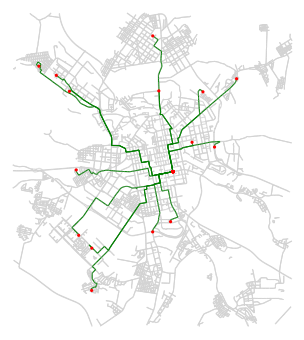

In [244]:
name = 'routes_to_random_inf'
fig, ax = ox.plot.plot_graph_routes(m.graph, routes_list, save=True, show=True, filename=name, file_format='png', node_alpha=0, edge_color='lightgray', edge_alpha=1, edge_linewidth=1, route_color='g', route_linewidth=1, route_alpha=1, orig_dest_node_size=10, orig_dest_node_color='r', orig_dest_node_alpha=1)

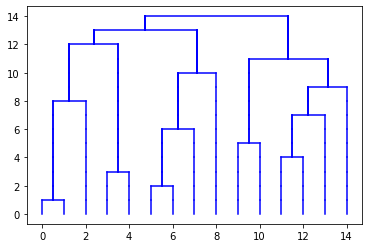

In [245]:
m.dendrogram(objs)

In [246]:
clusters, _ = m.objs_into_clusters(objs, 2)
m.work_with_centroids(objs, clusters, inf_obj)
print(clusters)

(11735.454999999996, [[4353602429, 293106130, 803416079, 2373086511, 658993526, 694066120, 410056357, 6736437450, 598408634, 410056358, 3514100852, 3701676381, 750390001, 225604290, 750390129, 3514100851, 1108653903, 6010618445, 1344686793, 6010618466, 225604293, 6010618467, 4006840293, 410062604, 410062605, 6684811656, 293107382, 807615544, 6736457109, 760261946, 6736437446, 6736437442, 1991814307, 225658109, 866626598, 2307214095, 1615227523, 866626944, 225604300, 708414906, 1615251772, 4937881712, 740705334, 223291357, 913118169, 225648110, 750355180, 1615248066, 724896213, 5027780475, 223291356, 724896212, 807556834, 708414897, 223291355, 2351239237, 807556849, 175054408, 740705348, 3639641978, 771597846, 1768486810, 747722336, 175054407, 747722378, 793142317, 2924608798, 2270104649, 6473471204, 3639645613, 847530101, 175054406, 748779902, 793882464, 175054405, 490596679, 2351971123, 1809083954, 1271727500, 4346949759, 598701740, 416564071, 175054404, 847531513, 1387829350, 3881489

In [247]:
clusters, _ = m.objs_into_clusters(objs, 3)
print(clusters)
m.work_with_centroids(objs, clusters, inf_obj)

[[0, 1, 11, 4, 9], [2, 5, 14, 7], [3, 6, 8, 10, 13, 12]]
(22240.634000000005, [[4353602429, 293106130, 803416079, 2373086511, 658993526, 694066120, 410056357, 6736437450, 598408634, 410056358, 3514100852, 3701676381, 750390001, 225604290, 750390129, 3514100851, 1108653903, 6010618445, 1344686793, 6010618466, 225604293, 6010618467, 4006840293, 410062604, 410062605, 6684811656, 293107382, 866626763, 2046596663, 1726852332, 1726852275, 6711752426, 6824854874, 618260337, 725238550, 6824854868, 742221443, 2339120977, 212641540, 807615524, 2471636809, 3514094828, 2068584452, 4625250963, 807615517, 225658112, 807615550, 1278990843, 2351239232, 212641542, 1990653939, 212641545, 212641546, 212641548, 1990653936, 212641550, 956784985, 212641552, 1617470225, 639030525, 3514082273, 3870405541, 633565264, 645014704, 3870405540, 1366840050, 414443436, 956784996, 1002961495, 1015462003, 176195127, 1051012384, 1050979672, 414443282, 761892229, 1801577506, 5139822667, 5139822673, 761892203, 1210715113,

In [248]:
clusters, _ = m.objs_into_clusters(objs, 5)
print(clusters)
m.work_with_centroids(objs, clusters, inf_obj)

[[0, 1, 11], [2, 5, 14, 7], [3, 6], [4, 9], [8, 10, 13, 12]]
(35280.797000000035, [[4353602429, 293106130, 803416079, 2373086511, 658993526, 694066120, 410056357, 6736437450, 598408634, 410056358, 3514100852, 3701676381, 750390001, 225604290, 750390129, 3514100851, 1108653903, 6010618445, 1344686793, 6010618466, 225604293, 6010618467, 4006840293, 410062604, 410062605, 6684811656, 293107382, 866626763, 2046596663, 1726852332, 1726852275, 6711752426, 6824854874, 618260337, 725238550, 6824854868, 742221443, 2339120977, 212641540, 807615524, 2471636809, 3514094828, 2068584452, 4625250963, 807615517, 225658112, 807615550, 1278990843, 2351239232, 212641542, 1990653939, 212641545, 212641546, 212641548, 1990653936, 212641550, 956784985, 212641552, 1617470225, 639030525, 3514082273, 3870405541, 633565264, 645014704, 3870405540, 1366840050, 414443436, 956784996, 1002961495, 1015462003, 176195127, 1051012384, 1050979672, 414443282, 761892229, 1801577506, 5139822667, 5139822673, 761892203, 1210715